In [157]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [109]:
df=pd.read_csv('Salary_Data.csv')

In [110]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# EDA 

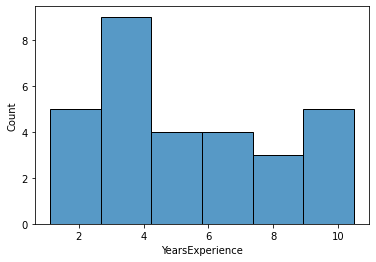

In [111]:
sns.histplot(df['YearsExperience'],kde=False)
plt.show()

Years of Experience by count

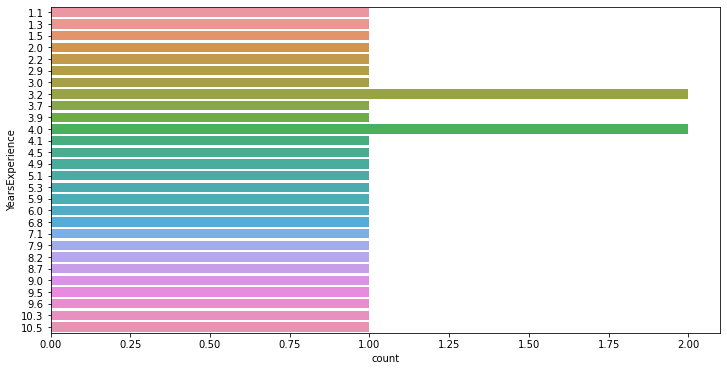

In [112]:
plt.figure(figsize = (12,6))
sns.countplot(y='YearsExperience', data=df)
plt.show()

Years of Exprience by salary 

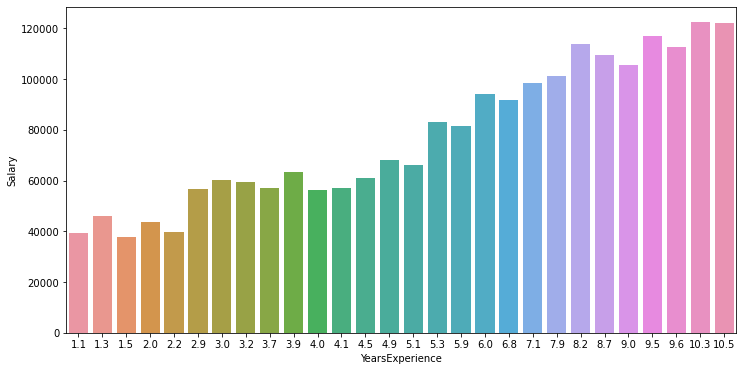

In [113]:
plt.figure(figsize = (12,6))
sns.barplot( x='YearsExperience',y='Salary',data=df,ci=None)
plt.show()

In [130]:
x=df['YearsExperience']

In [131]:
y=df['Salary']

In [148]:
x

<PandasArray>
[
[1.1],
[1.3],
[1.5],
[2.0],
[2.2],
[2.9],
[3.0],
[3.2],
[3.2],
[3.7],
[3.9],
[4.0],
[4.0],
[4.1],
[4.5],
[4.9],
[5.1],
[5.3],
[5.9],
[6.0],
[6.8],
[7.1],
[7.9],
[8.2],
[8.7],
[9.0],
[9.5],
[9.6],
[10.3],
[10.5]
]
Shape: (30, 1), dtype: float64

In [133]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

Reshaping to an array

In [135]:
x=x.array.reshape(-1,1)

In [136]:
x

<PandasArray>
[
[1.1],
[1.3],
[1.5],
[2.0],
[2.2],
[2.9],
[3.0],
[3.2],
[3.2],
[3.7],
[3.9],
[4.0],
[4.0],
[4.1],
[4.5],
[4.9],
[5.1],
[5.3],
[5.9],
[6.0],
[6.8],
[7.1],
[7.9],
[8.2],
[8.7],
[9.0],
[9.5],
[9.6],
[10.3],
[10.5]
]
Shape: (30, 1), dtype: float64

In [138]:
reg=LinearRegression().fit(x,y)

In [139]:
reg

LinearRegression()

Getting the attribute of the object

In [140]:
reg.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([9449.96232146]),
 '_residues': 938128551.6684293,
 'rank_': 1,
 'singular_': array([15.28249543]),
 'intercept_': 25792.20019866871}

$
                                                                 Salary = 25792 + 25792   YearsExperience
$

In [143]:
reg.predict(x)

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

Create a column for the prediction

In [144]:
df['pred'] = reg.predict(x)

In [146]:
df.head()

,YearsExperience,Salary,pred
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306


Make predictions

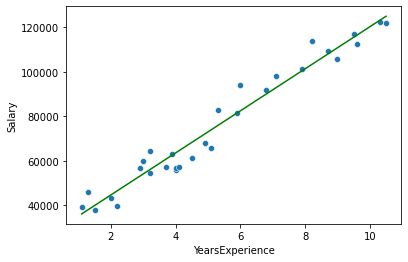

In [174]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
#sns.scatterplot(x='YearsExperience', y='pred', data=df)
sns.lineplot(x='YearsExperience', y='pred', data=df, color ='green')


plt.show()

Calculating the Residuals

In [163]:
df['error']= df.YearsExperience - df.pred

In [164]:
df

,YearsExperience,Salary,pred,error
0,1.1,39343,36187.158752,-36186.058752
1,1.3,46205,38077.151217,-38075.851217
2,1.5,37731,39967.143681,-39965.643681
3,2.0,43525,44692.124842,-44690.124842
4,2.2,39891,46582.117306,-46579.917306
5,2.9,56642,53197.090931,-53194.190931
6,3.0,60150,54142.087163,-54139.087163
7,3.2,54445,56032.079627,-56028.879627
8,3.2,64445,56032.079627,-56028.879627
9,3.7,57189,60757.060788,-60753.360788


In [166]:
df.error.sum()

-2279930.6

In [168]:
df['error2']=df.error**2

In [169]:
df

,YearsExperience,Salary,pred,error,error2
0,1.1,39343,36187.158752,-36186.058752,1.309431e+09
1,1.3,46205,38077.151217,-38075.851217,1.449770e+09
2,1.5,37731,39967.143681,-39965.643681,1.597253e+09
3,2.0,43525,44692.124842,-44690.124842,1.997207e+09
4,2.2,39891,46582.117306,-46579.917306,2.169689e+09
5,2.9,56642,53197.090931,-53194.190931,2.829622e+09
6,3.0,60150,54142.087163,-54139.087163,2.931041e+09
7,3.2,54445,56032.079627,-56028.879627,3.139235e+09
8,3.2,64445,56032.079627,-56028.879627,3.139235e+09
9,3.7,57189,60757.060788,-60753.360788,3.690971e+09


In [172]:
#the Residuals sum of a sqr
rss=df.error2.sum()

In [173]:
rss

194121886728.83157

In [175]:
df.Salary.mean()

76003.0